In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
audio_path = '../../data/dafit/DF_903_split/train/bed/00176480_nohash_0.wav'

In [5]:
sr = librosa.get_samplerate(audio_path)
y, sr = librosa.load(audio_path, sr=sr)

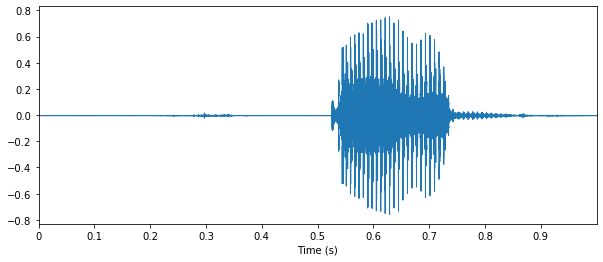

In [8]:
# librosa.display.waveplot을 이용해도 비슷한 결과를 볼 수 있다.
plt.figure(figsize=(10,4))
librosa.display.waveplot(y, sr=sr, x_axis='s');

In [9]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.amplitude_to_db(S, ref=np.max) # == librosa.power_to_db(S**2, ref=np.max)
S_dB = librosa.power_to_db(S, ref=np.max)

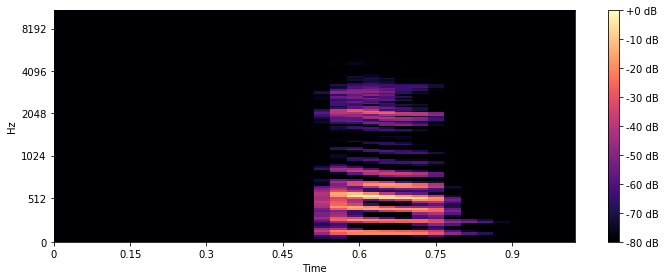

In [20]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout();

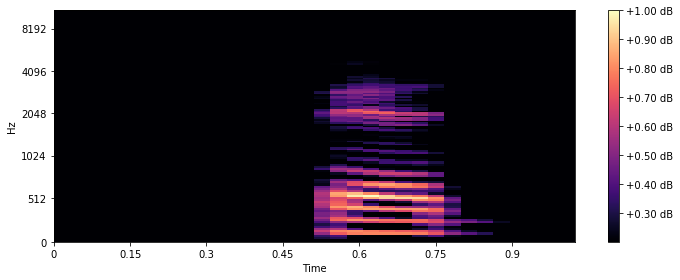

In [21]:
min_level_db = -100
_normalize = lambda S: np.clip((S - min_level_db) / -min_level_db, 0, 1)
norm_S = _normalize(log_S)
plt.figure(figsize=(10,4))
librosa.display.specshow(norm_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+0.2f dB')
plt.tight_layout();

참고 코드 : https://banana-media-lab.tistory.com/entry/Librosa-python-library%EB%A1%9C-%EC%9D%8C%EC%84%B1%ED%8C%8C%EC%9D%BC-%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0